<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/RNN_Examples/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Futile Stock Price Prediction with LSTM

This project predicts stock prices based on historical financial data using RNN LSTM.  It is a good practice of LSTM but does absolutely nothing for financial speculation as I believe stock prices follow a random walk process.


In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 11.3 MB 29.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


     |████████████████████████████████| 109 kB 29.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


After you upgraded pandas and pandas-datareader, restart runtime before excuting the following codes.

In [60]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [36]:
# Get the stock quote
df = web.DataReader('PFE', data_source='yahoo', start='2010-01-01', end='2021-10-20')
print(df.head())
# print(df)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2010-01-04  17.969639  17.305504  17.333965  17.960152  54898644.0  11.590305
2010-01-05  17.960152  17.599621  17.950665  17.703985  45714931.0  11.424988
2010-01-06  17.846300  17.561670  17.703985  17.647058  43640975.0  11.388253
2010-01-07  17.713472  17.514231  17.685009  17.580645  41557112.0  11.345391
2010-01-08  17.751423  17.571157  17.666035  17.722960  32049716.0  11.437236


(2971, 6)


<function matplotlib.pyplot.show>

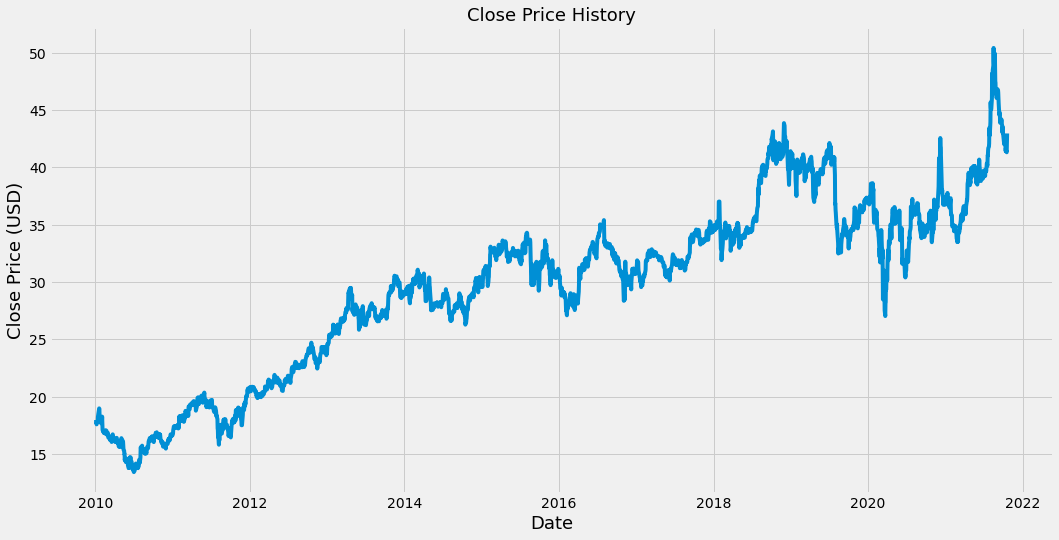

In [37]:
# Get the number of rows and columns in the data set
print(df.shape)
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Close Price History', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD)', fontsize=18)
plt.show

In [38]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
print(training_data_len)

2377


In [39]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(len(scaled_data))
print(scaled_data)

2971
[[0.12281208]
 [0.11588949]
 [0.11435111]
 ...
 [0.75408359]
 [0.77489192]
 [0.79840259]]


In [40]:
# Create the training dataset
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

sequence_len = 80

for i in range(sequence_len, len(train_data)):
  x_train.append(train_data[i-sequence_len:i, 0])
  y_train.append(train_data[i, 0])
  if i<=sequence_len+1:
    print(x_train)
    print(y_train)
    print()

[array([0.12281208, 0.11588949, 0.11435111, 0.11255636, 0.11640225,
       0.12024813, 0.11870981, 0.12999104, 0.13434974, 0.13717006,
       0.1502461 , 0.14870772, 0.13076023, 0.12358126, 0.12076094,
       0.11896619, 0.12460683, 0.1151203 , 0.11588949, 0.11922257,
       0.13076023, 0.11486392, 0.09973675, 0.097942  , 0.0948653 ,
       0.09589086, 0.09230135, 0.09563443, 0.09383973, 0.09178854,
       0.0905066 , 0.09204498, 0.09871118, 0.09768562, 0.0905066 ,
       0.09409611, 0.09101941, 0.0874299 , 0.09255773, 0.08871185,
       0.08153288, 0.08178926, 0.08563515, 0.08230207, 0.07922532,
       0.07717418, 0.08076369, 0.07537943, 0.0799945 , 0.0799945 ,
       0.07871256, 0.07922532, 0.07102078, 0.07717418, 0.08717347,
       0.08896828, 0.08332758, 0.0769178 , 0.08050731, 0.0799945 ,
       0.07717418, 0.07537943, 0.0707644 , 0.07230273, 0.07512305,
       0.0769178 , 0.07973812, 0.08076369, 0.07794337, 0.07512305,
       0.07307192, 0.06820044, 0.06794406, 0.06717487, 0.0630

In [41]:
type(x_train)

list

In [42]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
display(type(x_train))
display(x_train.shape)

# Reshape the data for the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
display(x_train.shape[1])

numpy.ndarray

(2297, 80)

80

**Long Short Term Memory (LSTM) Network**

<!-- ![alt text](http://colah.github.io/images/post-covers/lstm.png) -->
![alt text](https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)


**Gated Recurrent Unit (GRU)**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Gated_Recurrent_Unit%2C_base_type.svg/2880px-Gated_Recurrent_Unit%2C_base_type.svg.png)

Initially, for $t=0$, the output vector is $h_{0}=0$.

\begin{aligned}z_{t}&=\sigma _{g}(W_{z}x_{t}+U_{z}h_{t-1}+b_{z})\\r_{t}&=\sigma _{g}(W_{r}x_{t}+U_{r}h_{t-1}+b_{r})\\{\hat {h}}_{t}&=\phi _{h}(W_{h}x_{t}+U_{h}(r_{t}\odot h_{t-1})+b_{h})\\h_{t}&=(1-z_{t})\odot h_{t-1}+z_{t}\odot {\hat {h}}_{t}\end{aligned}

where, the operator $\odot$  denotes the Hadamard product.

Variables
- $x_{t}$: input vector
- $h_{t}$: output vector
- $\hat{h}_{t}$: candidate activation vector
- $z_{t}$: update gate vector
- $r_{t}$: reset gate vector
- $W$, $U$ and $b$: parameter matrices and vector


Activation functions
- $\sigma _{g}$: The original is a sigmoid function.
- $\phi _{h}$: The original is a hyperbolic tangent.



In [61]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(80, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(GRU(80, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 80, 80)            26240     
_________________________________________________________________
gru (GRU)                    (None, 80)                38880     
_________________________________________________________________
dense_6 (Dense)              (None, 25)                2025      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 67,171
Trainable params: 67,171
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
2297/2297 [==============================] - 82s 34ms/step - loss: 7.8211e-04
Epoch 2/2
2297/2297 [==============================] - 79s 34ms/step - loss: 3.3902e-04


In [47]:
# Create the testing data set
# Create a new array containing scaled values indexed from (training_data_len - sequence_len) to the end.
test_data = scaled_data[training_data_len - sequence_len:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(sequence_len, len(test_data)):
  x_test.append(test_data[i-sequence_len:i, 0])

In [48]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [49]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [51]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

0.44345456582528575


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


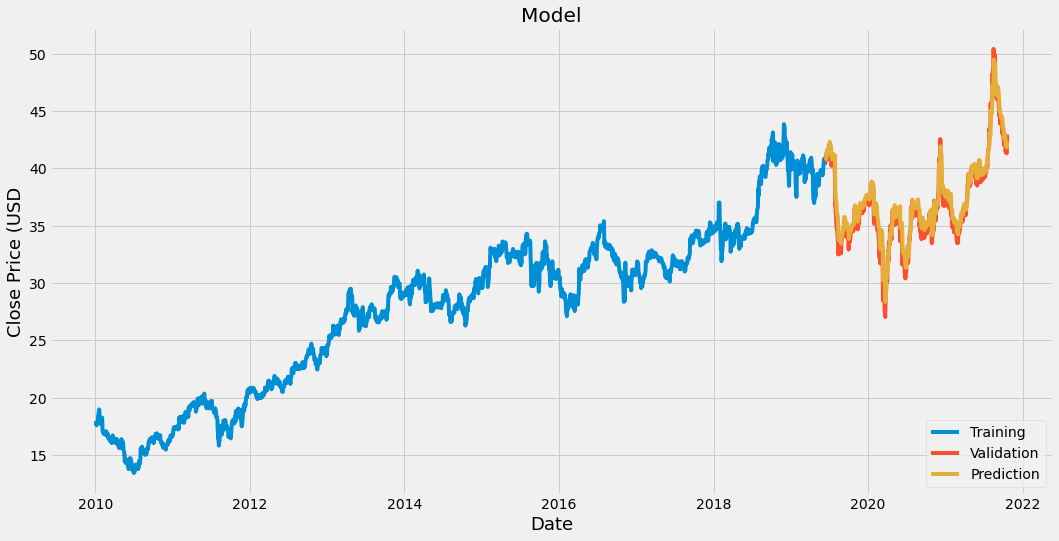

In [52]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [53]:
# Show the valid and predicted prices
print(valid)

                Close  Predictions
Date                              
2019-06-14  40.569260    40.694023
2019-06-17  40.683113    40.762600
2019-06-18  40.863377    40.908962
2019-06-19  41.271347    41.093971
2019-06-20  41.366222    41.428539
...               ...          ...
2021-10-14  41.669998    41.979347
2021-10-15  41.490002    42.055508
2021-10-18  41.320000    41.998497
2021-10-19  42.090000    41.856041
2021-10-20  42.959999    42.331383

[594 rows x 2 columns]


In [54]:
# Get the quote
test_quote = web.DataReader('PFE', data_source='yahoo', start='2010-01-01', end='2021-10-20')
# Create a new dataframe
new_df = test_quote.filter(['Close'])
# Get the last 80 day closing price values and convert the dataframe to an array
last_80_days = new_df[-80:].values
# Scale the data to be values between 0 and 1
last_80_days_scaled = scaler.transform(last_80_days)
# Create an empty list
X_test = []
# Append the past 80 days
X_test.append(last_80_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Inverse scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[43.057224]]


In [56]:
test_quote2 = web.DataReader('PFE', data_source='yahoo', start='2021-09-30', end='2021-10-21')
print(test_quote2['Close'])

Date
2021-09-30    43.009998
2021-10-01    42.930000
2021-10-04    42.419998
2021-10-05    42.320000
2021-10-06    42.020000
2021-10-07    42.740002
2021-10-08    42.450001
2021-10-11    42.060001
2021-10-12    41.849998
2021-10-13    41.419998
2021-10-14    41.669998
2021-10-15    41.490002
2021-10-18    41.320000
2021-10-19    42.090000
2021-10-20    42.914799
Name: Close, dtype: float64
